<a href="https://colab.research.google.com/github/Anavillag/Business-Analytics/blob/main/4_RetoParcial1AnaMar%C3%ADaVillaG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto Parcial 1**

Ana María Villa González


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Naive Bayes**

0.Cargar las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd #Conexiones con archivos de excel

from sklearn.naive_bayes import GaussianNB #Modelo Gaussian Naive Bayes
from sklearn.metrics import confusion_matrix #Metricas- Como lo voy a evaluar

1. Se procede con la carga de datos

In [ ]:
nxl='/content/4. BD_Parcial_M_Int.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB.dropna() #Elimina los valores nulos
XDB.head(100)

#Creamos el DataMart
XD=XDB[['BM','Bath','SQFT','Lot_Size','Age','Price']] #Variables de Entrada
XD
yd=XDB[['Type']] #Este es el valor deseado - que lo aprenda el modelo
yd

,Type
0,1
1,1
2,1
3,1
4,1
...,...
275,1
276,1
277,1
278,1


2. Se procede con la evaluación del modelo

In [ ]:
from re import X
from functools import cmp_to_key
mnb=GaussianNB()
mnb.fit(XD,yd)
np.set_printoptions(precision=3,suppress=True)

#Evaluamos el modelo

ydp=mnb.predict(XD)

#Analizamos los resultados arrojados por el modelo
u=mnb.theta_  #Son las medias
print("Las medias de las variables son:\n", u)
sigma=np.sqrt(mnb.var_)
print("Los valores de las desviaciones son:\n",sigma)

#Se procede con el análisis de las variacioens de las variables
LS=u+sigma
print("Los limites superiores para las variables son:\n",LS)
LI=u-sigma
print("Los limites inferiores para las variables son:\n",LI)

#Se procede con la evaluación del comportamiento del modelo
#Prediciendo los valores de preaprobación del valor deseado
ydp=mnb.predict(XD)

cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]
print("VN=",VN)
print("FP=",FP)
print("FN=",FN)
print("VP=",VP)

#Exactitud
Ex=(VP+VN)/len(XD)
print("La exactitud del modelo es:\n",Ex)

#Sensibilidad
Sen=VP/(VP+FN)
print("La sensibilidad del modelo es:\n",Sen)

#Especificidad
Esp=VN/(VN+FP)
print("La especificidad del modelo es:\n",Esp)



Las medias de las variables son:
 [[      6.303       4.697    3220.606    5185.         83.364 1201121.212]
 [      3.146       2.04     1766.636    5250.153      87.66  1144392.49 ]]
Los valores de las desviaciones son:
 [[    19.363     18.953   2591.886   2062.653     30.266 955229.943]
 [    18.664     18.623    851.651   2612.861     26.21  519414.128]]
Los limites superiores para las variables son:
 [[     25.666      23.65     5812.492    7247.653     113.63  2156351.155]
 [     21.81       20.663    2618.286    7863.014     113.87  1663806.618]]
Los limites inferiores para las variables son:
 [[   -13.06     -14.256    628.72    3122.347     53.097 245891.27 ]
 [   -15.518    -16.582    914.985   2637.292     61.45  624978.362]]
La matriz de confusión es:
 [[  7  26]
 [  8 239]]
VN= 7
FP= 26
FN= 8
VP= 239
La exactitud del modelo es:
 0.8785714285714286
La sensibilidad del modelo es:
 0.9676113360323887
La especificidad del modelo es:
 0.21212121212121213


**Árboles de Decisión**

0. Librerias de trabajo

In [ ]:
#Se trae el modelo
from sklearn.tree import DecisionTreeClassifier

1.

In [ ]:
nxl='/content/4. BD_Parcial_M_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna() #Para evitar celdas vacias (no se puede olvidar)
XDB.head()


#Seleccionamos las variables de interés
XD=XDB[['BM','Bath','SQFT','Lot_Size','Age','Price']]
XD.head()
XD=np.array(XD)
yd=XDB[['Type']];yd=np.array(yd) #Variable de Salida - Convierto a la tabla

2. Se procede con la construcción del modelo de Árbol

In [ ]:
np.random.seed(42)

mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)
ydp=mar.predict(XD)

#Evaluamos el modelo
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
print('VN=',VN,'FP=',FP,'FN=',FN,'VP=',VP)

Ex=(VP+VN)/(VP+VN+FP+FN)
Ex  #Exactitud

Se=VP/(VP+FN)
Se  #Sensibilidad

Es=VN/(VN+FP)
Es  #Especificidad

print('Exactitud:',Ex)
print('Sensibilidad:',Se)
print('Especificidad:',Es)

VN= 20 FP= 13 FN= 3 VP= 244
Exactitud: 0.9428571428571428
Sensibilidad: 0.9878542510121457
Especificidad: 0.6060606060606061


3.Se procede con la visualización del Árbol

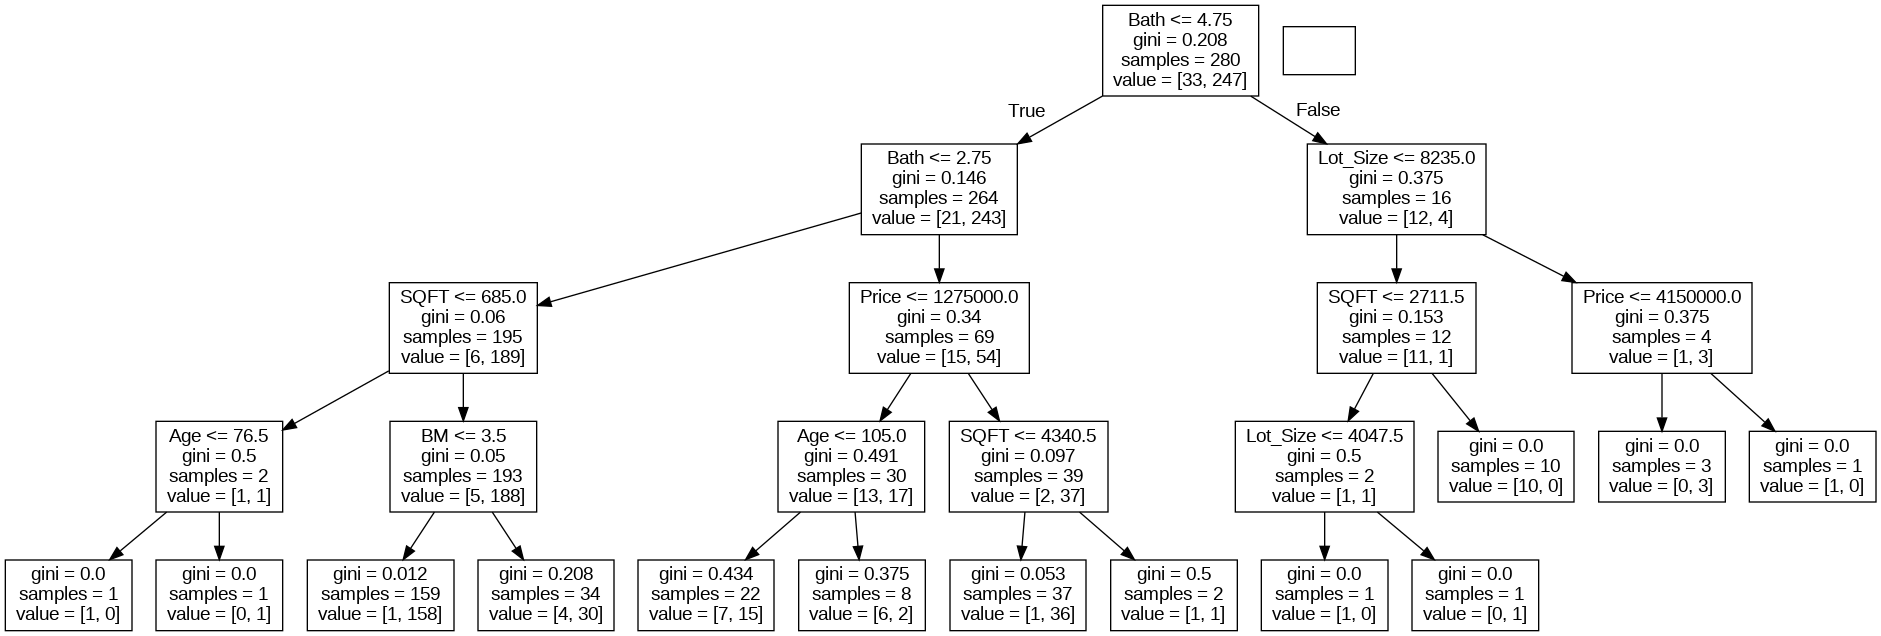

In [ ]:
from sklearn.tree import export_graphviz  #Estructura del Árbol
from pydotplus import graph_from_dot_data  #Que datos le voy a colocar al árbol
from IPython.display import Image #Para visualizarlo

vs=['BM','Bath','SQFT','Lot_Size','Age','Price'] #Estos nombres aparecen en el árbol

dot_data=export_graphviz(mar,feature_names=vs) #Asegurar nombres del gráfico
graph=graph_from_dot_data(dot_data)  #Se hace el gráfico del Árbol
graph.write_png('arbolretoparcial1.png') #Se crea la imagen
Image(graph.create_png())

**Modelo KNN-Key Nearest Neighbor**

0.Carga de las librerias

In [ ]:
import numpy as np              #Funciones matematicas
import pandas as pd               #Conexión con exel
import matplotlib.pyplot as plt   #Graficas
import seaborn as sns             #Para Graficar Distribuciones Estadísticas



from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn.metrics import confusion_matrix   #Matriz de confusión
from sklearn.cluster import KMeans  #K-means es montocitos de datos



1.Se cargan los datos

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

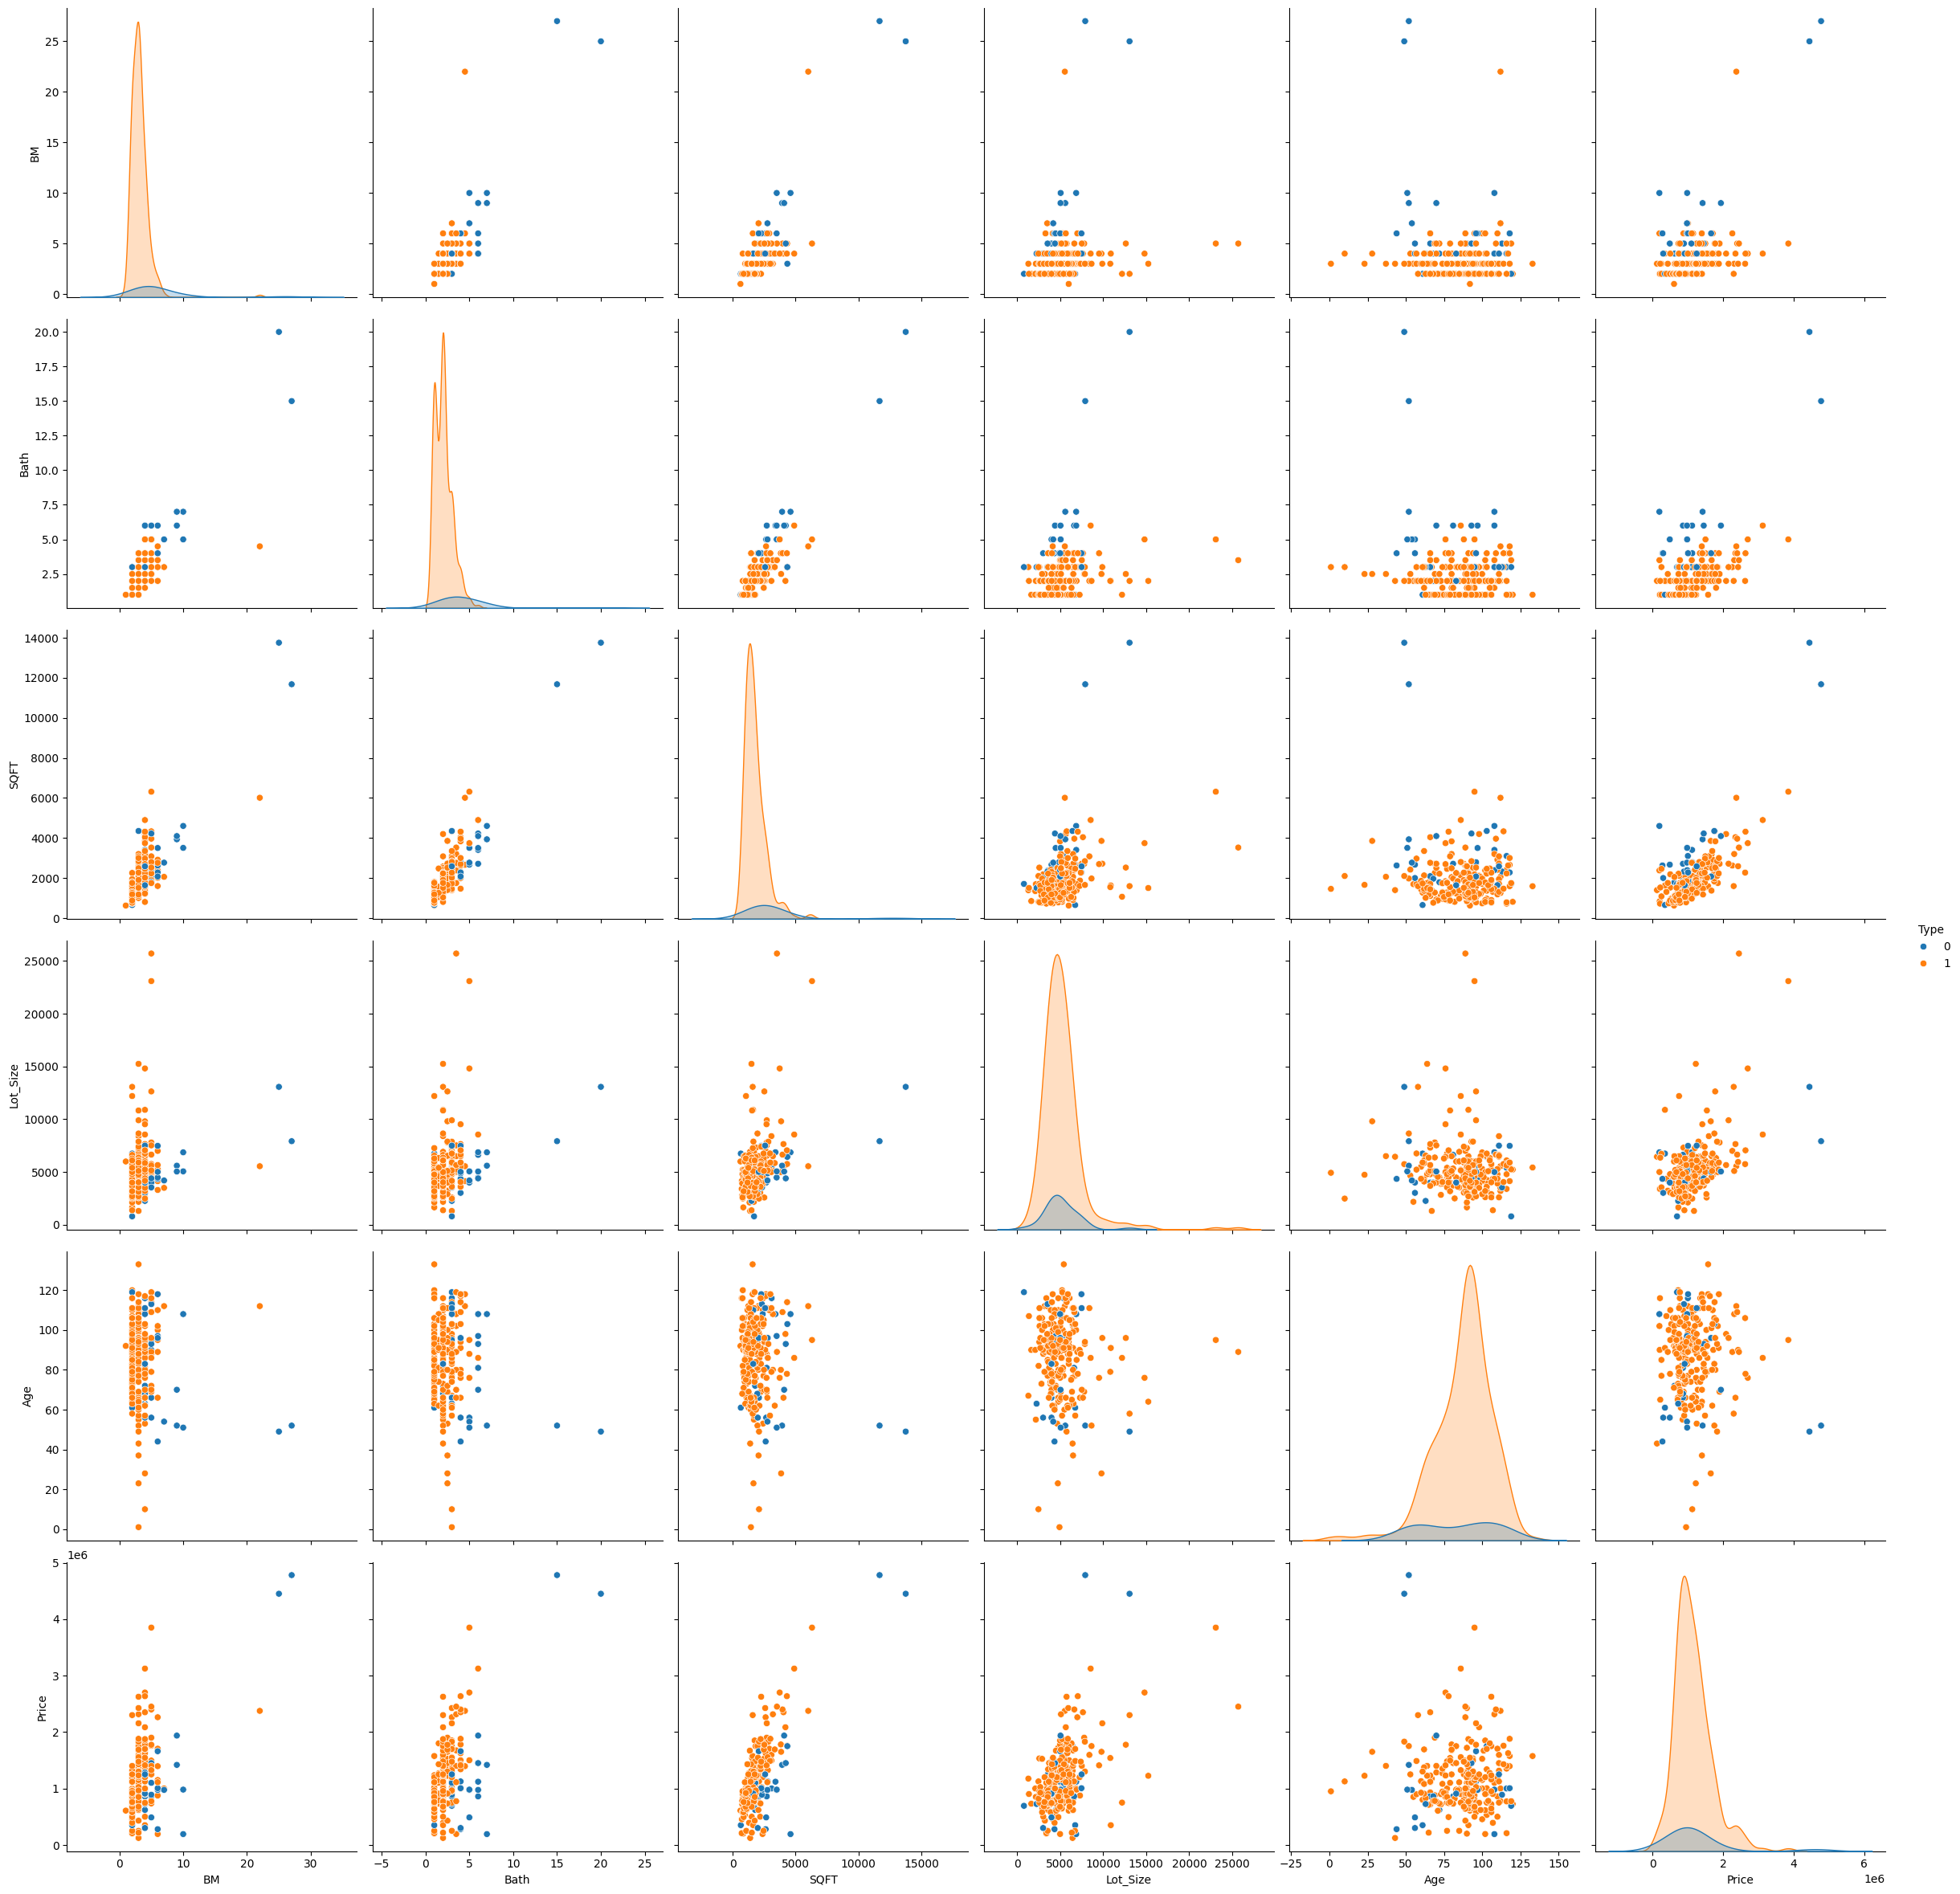

,BM,Bath,SQFT,Lot_Size,Age,Price,Type
BM,1.000000,0.812095,0.834589,0.220007,-0.122348,0.538807,-0.394785
Bath,0.812095,1.000000,0.895919,0.307301,-0.164940,0.603167,-0.483988
SQFT,0.834589,0.895919,1.000000,0.420914,-0.118593,0.755523,-0.364861
Lot_Size,0.220007,0.307301,0.420914,1.000000,-0.093683,0.511223,0.008225
Age,-0.122348,-0.164940,-0.118593,-0.093683,1.000000,-0.034638,0.072017
Price,0.538807,0.603167,0.755523,0.511223,-0.034638,1.000000,-0.031102
Type,-0.394785,-0.483988,-0.364861,0.008225,0.072017,-0.031102,1.000000


<Figure size 640x480 with 0 Axes>

In [ ]:
nxl= '/content/4. BD_Parcial_M_Int.xlsx'
XDB= pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(5)

# 1. Se seleccionan las variables de interés
XDB=XDB[['BM','Bath','SQFT','Lot_Size','Age','Price', 'Type']]
XDB.head(5)
#2. Determinar la correlación entre las variables
#y su impacto entre las variables de salida
plt.figure(figsize=(10,10))
sns.pairplot(XDB.dropna(),hue='Type',size=4, vars=['BM', 'Bath', 'SQFT', 'Lot_Size','Age','Price'],kind='scatter')
plt.show()

plt.figure()

# 3. La correlación numérica es
XDB.corr()




2. Se procede con la implementación del modelo KNN

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
La matriz de confusión es:
: [[  2  31]
 [  0 247]]
Exactitud: 0.8892857142857142
Sensibilidad: 1.0
Especificidad: 0.06060606060606061
La predicción es: [1]
La predicción es: [1]


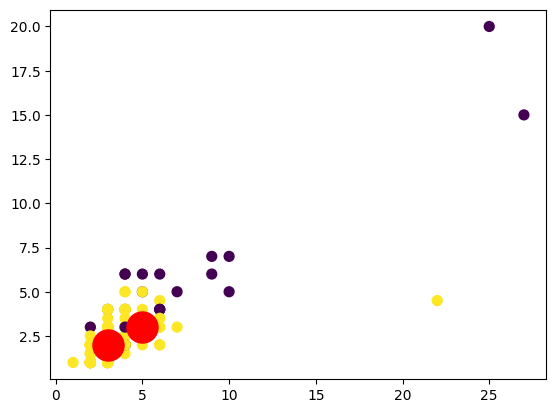

In [ ]:
XD=np.array(XDB[['BM','Bath','SQFT','Lot_Size','Age','Price']]) #Variables de Entrada
yd=np.array(XDB['Type'])                                                #Variable de Salida

Knn=KNeighborsClassifier(n_neighbors=10)                          #Evaluame frente a 10
Knn.fit(XD,yd)

ydp=Knn.predict(XD)
print(ydp)

#Evaluamos el modelo KNN
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n:",cm)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)

print("Exactitud:",Exactitud)
print("Sensibilidad:",Sensibilidad)
print("Especificidad:",Especificidad)

#3. Evaluamos un paciente o pacienta
XDp1=np.array([(3,2,1479,4791,66,800000)])

ydpp=Knn.predict(XDp1)
print("La predicción es:",ydpp)


XDp2=np.array([(5,3,2092,3998,66,925000)])

ydp2=Knn.predict(XDp2)
print("La predicción es:",ydp2)


#Donde se encuentra el paciente
plt.figure()
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')       #Gráfico de correlación entre Ing-Egr> correlacion
plt.scatter(XDp1[:,0],XDp1[:,1],marker='o',s=500,facecolors='red')
plt.scatter(XDp2[:,0],XDp2[:,1],marker='o',s=500,facecolors='red') #Es graficar el paciente o la pacienta
plt.show()



**Modelo K-Means**

1. Se procede con la implementación del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Los centroides son los siguientes:
 [[      2.893       1.775    1429.115    4412.998      87.328  836089.344]
 [      3.484       2.463    1944.568    5251.432      87.716 1292431.579]
 [      4.459       3.041    3009.568    7365.573      88.    1985189.189]
 [     15.25       11.5      9160.25    13156.2        70.5   4051000.   ]
 [      3.409       2.273    1616.273    4794.091      85.364  357365.682]]


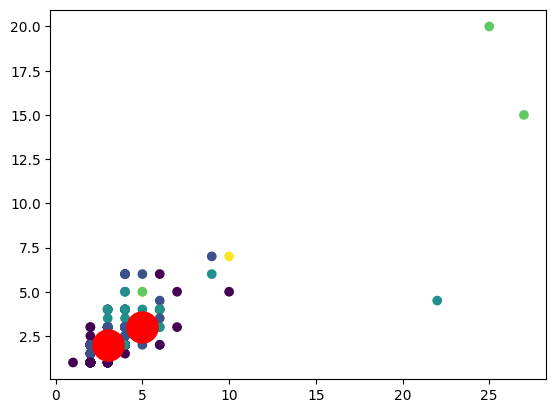

EL paciente pertenece al siguiente grupo: [0]
La matriz de confusión es:
: [[ 14   9   3   2   5]
 [108  86  34   2  17]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
Exactitud: 0.4608294930875576
Sensibilidad: 0.44329896907216493
Especificidad: 0.6086956521739131
La predicción es: [1]
La predicción es: [1]


In [ ]:
import seaborn as sns
np.random.seed(42) #Vamos a tomar las mismas semillas
#1. Construimosla estuctura del modelo
k=5   #5 montoncitos de datos
mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD)
np.set_printoptions(precision=3,suppress=True)


centroids=mkm.cluster_centers_
print( "Los centroides son los siguientes:\n",centroids)

plt.figure()
plt.scatter(XD[:,0],XD[:,1],c=mkm.labels_,cmap='viridis') #Esta gráfica me permite agrupar los datos por colores
plt.scatter(XDp1[:,0],XDp1[:,1],marker='o',s=500,facecolors='red')
plt.scatter(XDp2[:,0],XDp2[:,1],marker='o',s=500,facecolors='red') #Es graficar el paciente o la pacienta
plt.show()

ydp2=mkm.predict(XDp2)
print("EL paciente pertenece al siguiente grupo:",ydp2)


ydp3=mkm.predict(XD)


#Evaluamos el Modelo K-Means
cm=confusion_matrix(yd,ydp3)
print("La matriz de confusión es:\n:",cm)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)

print("Exactitud:",Exactitud)
print("Sensibilidad:",Sensibilidad)
print("Especificidad:",Especificidad)

#3. Evaluamos un paciente o pacienta
XDp1=np.array([(3,2,1479,4791,66,800000)])

ydpp=Knn.predict(XDp1)
print("La predicción es:",ydpp)


XDp2=np.array([(5,3,2092,3998,66,925000)])

ydp2=Knn.predict(XDp2)
print("La predicción es:",ydp2)


In [ ]:
labels=mkm.labels_
print("Los labels son:\n",labels) #Esto inidca el lugar en el que cayó cada persona

counts_1=np.bincount(labels)
print("Los conteos son:\n",counts_1)

c01=len(np.where((labels==0) & (yd==1)) [0] )#Digame cuantos son los pacientes que no van a desarrollar la enfermedad dentro del primer culster
c00=len(np.where((labels==0) & (yd==0)) [0] )#Digame cuantos son los pecientes dentro del primer culster
print("Las personas con enfermedad cardiaca en el cluster 0 son:",c01)
print("Las personas que no desarrollaran enfermedad cardiaca en el cluster 0 son:",c00)

c11=len(np.where((labels==1) & (yd==1)) [0] )#Digame cuantos son los pacientes que no van a desarrollar la enfermedadprimer culster
c10=len(np.where((labels==1) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Las personas con enfermedad cardiaca en el cluster 1 son:",c11 )
print("Las personas que no desarrollaran enfermedad cardiaca en el cluster 1 son:",c10)

c21=len(np.where((labels==2) & (yd==1)) [0] )#Digame cuantos son los preaprobados dentro del primer culster
c20=len(np.where((labels==2) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Las personas con enfermedad cardiaca en el cluster 2 son:",c21 )
print("Las personas que no desarrollaran  enfermedad cardiaca en el cluster 2 son:",c20)
print("El procentaje de las personas con enfermedad cardiaca en el cluster 2 son:",c21/(c21+c20))
print("El procentaje de las personas que no desarrollaran enfermedad cardiaca en el cluster 2 son:",c20/(c21+c20))


c31=len(np.where((labels==3) & (yd==1)) [0] )#Digame cuantos son los preaprobados dentro del primer culster
c30=len(np.where((labels==3) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Las personas con enfermedad cardiaca en el cluster 3 son:",c31 )
print("Las personas que no desarrollaran enfermedad cardiaca en el cluster 3 son:",c30)

c41=len(np.where((labels==4) & (yd==1)) [0] )#Digame cuantos son los preaprobados dentro del primer culster
c40=len(np.where((labels==4) & (yd==0)) [0] )#Digame cuantos son los prenegados dentro del primer culster
print("Las personas con enfermedad cardiaca en el cluster 4 son:",c41 )
print("Las personas que no desarrollaran enfermedad cardiaca en el cluster 4 son:",c40)


Los labels son:
 [4 0 1 0 0 1 0 0 2 0 2 0 0 0 0 0 0 1 0 0 1 0 0 4 0 4 4 1 0 0 1 0 0 1 0 4 1
 3 4 1 4 1 0 4 4 0 0 0 2 0 4 0 0 0 4 1 1 0 4 4 1 0 0 4 0 0 0 0 0 4 0 0 1 2
 1 4 0 2 1 2 0 1 0 3 1 2 2 2 0 4 3 4 1 2 0 0 0 1 0 0 0 1 0 0 0 0 1 2 3 0 0
 0 0 1 0 0 0 0 1 4 0 0 4 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 2 1 0 0 1 1 1 1 2 1
 1 2 1 1 2 1 2 0 1 0 1 2 1 1 0 0 0 1 1 2 1 2 1 1 0 0 2 1 1 4 0 0 0 0 1 1 0
 1 0 0 1 1 0 1 1 0 1 0 0 0 2 2 1 1 0 1 1 0 1 2 0 1 1 1 4 1 2 0 1 2 2 2 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 2 0 1 0 1 1 1 2 1 1 2 1 2
 0 2 1 2 1 1 0 0 2 1 2 1 1 0 0 1 0 0 2 1 2]
Los conteos son:
 [122  95  37   4  22]
Las personas con enfermedad cardiaca en el cluster 0 son: 108
Las personas que no desarrollaran enfermedad cardiaca en el cluster 0 son: 14
Las personas con enfermedad cardiaca en el cluster 1 son: 86
Las personas que no desarrollaran enfermedad cardiaca en el cluster 1 son: 9
Las personas con enfermedad cardiaca en el cluster 2 son: 34
Las personas que no desarrollaran  

**Analisis**

-Las variables que presentan una mayor correlación de salida con Type es Bath con un valor de -0.4839, y la variable que presentan una mayor correlacion de entrada son Bath es SQFT con un valor de 0.89.

- El grupo de datos de clasificación poseen la mayor antigüedad es el grupo 2 (contando desde cero)

- En el grupo 3 se presentan la mayor cantidad de pies cuadrados (SQFT) (Contando desde cero)

-Los resultados por el modelo propuesto cuenta con una base de datos que posee un total de 280 datos. Este modelo mostró una exactitud que alcanzó un porcentaje del 87% (Lo cual hace que el modelo sea considerado aceptable,puesto que lo ideal es que sea mayor a 75%), es decir que solo cuenta con un porcentaje de 13% en el que presenta error en los datos arrojados. La métrica de sensibilidad alcanzó un valor del 96% frente a la aprobación y una especificidad del 21%.

- De 7 nodos puros el que tienen mayor cantidad de datos es el nodo puro con la regla de negocio Bath>4.75, Lot_Size<=8235, SQFT>2711.5, el cual tiene 10 datos y queda [10,0] •

-La regla de negocio para la propiedad A, con las características (BM, Bath, SQFT, Lot_Size, Age, Price) equivalentes a [3, 2, 1479,4791, 66,800000] es: Bath<=4.75, Bath<=2.75, SQFT>685, BM<=3.5 y queda en [1, 158], con un porcentaje de pertenencia a la propiedad Multifamiliar (0) de 0,63% y a la propiedad Unifamilair (1) de 99%.

-La regla del negocio para la propiedad B, con las caracteristicas (BM, Bath, SQFT, Lot Size, Age, Price) equivalentes a [5,3,2092, 3998, 66,925000] es: Bath<=4.75, Bath>2.75, Price<=1275000, Age<=105 y queda en el nodo [7, 15] con un porcentaje de pertenencia a la propiedad Multifamiliar (0) de 32% y a la propiedad Unifamilair (1) de 68%.

-El cluster que posee el mayor tamaño de Lote es el 3 con un valor de 13.156

**Indices de KMeans**

- Este modelo mostró una exactitud que alcanzó un porcentaje del 46% (Lo cual hace que el modelo no sea considerado relativamente aceptable,puesto que lo ideal es que sea mayor a 75%), es decir que  cuenta con un porcentaje de 54% en el que presenta error en los datos arrojados. La métrica de sensibilidad alcanzó un valor del 44% frente a la aprobación y una especificidad del 60%.
-El cluster que posee el mayor tamaño de Lote es el 3 con un valor de 13156. En adición el cluster que posee la mayor cantidad de datos es el numero cero.




